# PREDICTION MODEL FOR SALARY HIKE

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ml_metrics import rmse

In [16]:
data=pd.read_csv('C:\\Users\\vishw\\Assignments\\Simple_linear_Regression\\Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Null values Checking

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


No Null values

# Correlation

In [18]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


r-value>0.85.
hence,there is strong positive correlation between years of experience & salary.

# Rename the column name

In [37]:
data1=data.rename({'YearsExperience':'exp'},axis=1)

In [38]:
data1.head()

,exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [39]:
data1[data1.duplicated(keep=False)]

,exp,Salary


So,No duplicates.

# check for the outliers

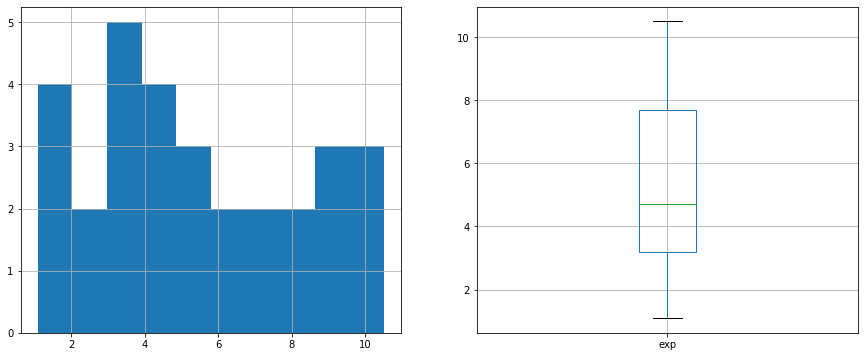

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data1['exp'].hist()
plt.subplot(1,2,2)
data1.boxplot(column=['exp'])
plt.show()

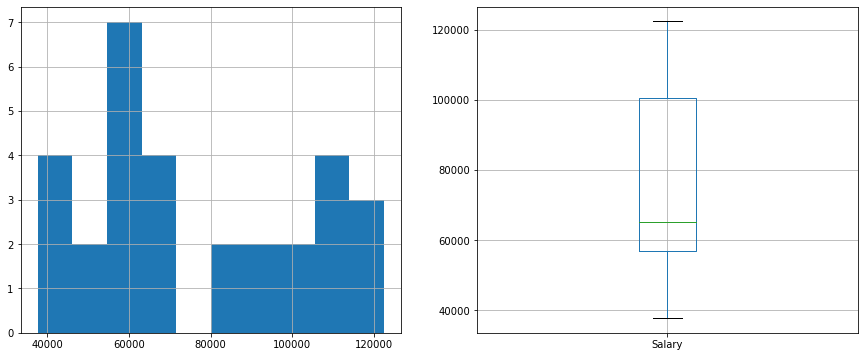

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data1['Salary'].hist()
plt.subplot(1,2,2)
data1.boxplot(column=['Salary'])
plt.show()

The above plot shows that, there are no outliers in the dataset.

# Checking distribution of the dataset

C:\Users\vishw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exp', ylabel='Density'>

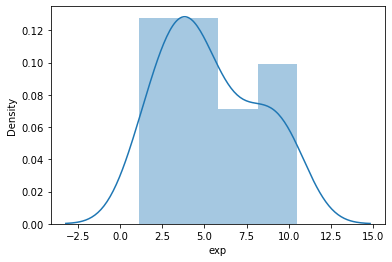

In [42]:
sns.distplot(data1['exp'])

C:\Users\vishw\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

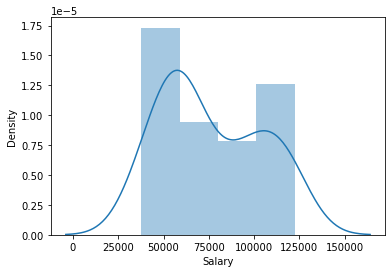

In [43]:
sns.distplot(data1['Salary'])

# predicting the model without applying a transformation

In [44]:
model = smf.ols("Salary~exp",data = data1).fit()

AttributeError: 'AxesSubplot' object has no attribute 'fit'

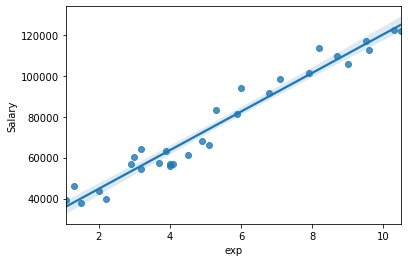

In [45]:
sns.regplot(x="exp",y="Salary",data=data1).fit()

In [ ]:
model.summary()

# In this model, r-value is greater than 0.85 and p-value is lesser than 0.05.
# Hence,this is the significant model for salary hike prediction.

# Now,checking the rmse value 

In [49]:
pred=model.predict(data1.exp)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [53]:
actual=data1.Salary

In [54]:
rmse(pred,actual)

5592.043608760662

# MODEL1 

# Predicting by Applying the transformation

In [60]:
model1 = smf.ols("Salary~np.log(exp)",data = data1).fit()

In [61]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           3.25e-13
Time:                        22:29:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# checking rmse value

In [66]:
pred=model1.predict(data1.exp)
pred

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [67]:
rmse(pred,actual)

10302.893706228304

# In this model1, the r-value is greater than 0.85 and p-value is lesser than 0.05. 

# Finally, we can conclude that,the camparison between model and model1 shows that,model without transformation is more effective than model1 with transformation for predicting the salary hike considering r-value and p-value.